# A. La régression lineaire

#I. Introduction
##II. Régression lineaire simple
Soit un ensemble de points $ \{ (x_{i},y_{i}) \in R^{2}  i=1...n \}$.
Trouver une fonction $h$ telle que $$h(x_{i}) \approx y_{i} \forall i \in \{1 ... n\}$$

### Q1. Ecrire un script qui permet d'obtenir le nuage de point suivant:
Remarque: On remaque qu'il y a une correlation entre x et y dans cette figure.

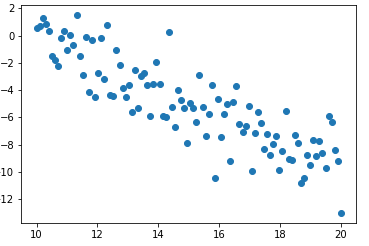

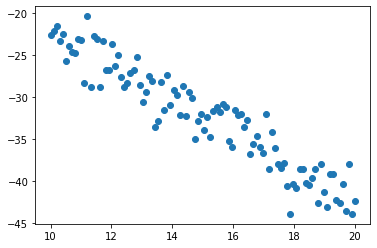

In [ ]:
# Votre code ici
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(10,20,100)
y=(x*-2)+np.random.normal(-2,2,size=(100))
plt.plot(x,y,'o')
plt.show()









Q2. Soit $h(x)=w_{0}+ w_{1}x$. Sur la meme figure, tracez h(x) pour differentes valeurs des coeficients  $w_{0}$ et $w_{1}$ et calculez la valeur de la fonction objective (coût) suivante:
$$ J(w_{0},w_{1})=\frac{1}{2m}\sum_{i=0}^{m}(h(x_{i})-y_{i})^{2} $$

Que remarquez-vous?


j1:  17536.8286954149
j2:  27079.38681136698


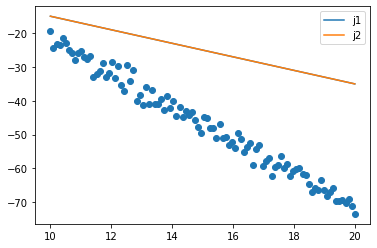

In [240]:
#Votre code ici
#trace h(x)
h1=-2*x+5
h2=-2*x+5
def cost_func(w0,w1,x,y):
  m=100
  j=(1/(2*m))*np.sum((w0+w1*x)-y)**2
  return j
j1=cost_func(2,-2,x,y)
print('j1: ',j1)
j2=cost_func(5,-5,x,y)
print('j2: ',j2)

plt.scatter(x,y)
plt.plot(x,h1,label='j1')
plt.plot(x,h2,label='j2')
plt.legend()
plt.show()








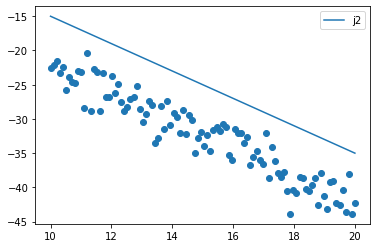

In [ ]:
plt.scatter(x,y)

plt.legend()
plt.show()

Q3. Pour minimiser le coût $$ J(w_{0},w_{1})=\frac{1}{2m}\sum_{i=0}^{m}(h(x_{i})-y_{i})^{2} = \frac{1}{2m}\sum_{i=0}^{m}(w_{0}+ w_{1}x_{i}-y_{i})^{2} $$
On utilise la methode de la descente du gradient. Il faut donc calculer la dérivée de $J(w_{0},w_{1})$ par rapport à $w_{0}$ et par rapport à $w_{1}$ nous avons alors:
$$ \frac{\delta J(w_{0},w_{1})}{\delta w_{0}}=\frac{1}{m}\sum_{i=0}^{m}(w_{0}+ w_{1}x_{i}-y_{i}) $$

$$ \frac{\delta J(w_{0},w_{1})}{\delta w_{1}}=\frac{1}{m}\sum_{i=0}^{m}(w_{0}+ w_{1}x_{i}-y_{i})x_{i} $$
A chaque itération, la mise à jour des coeficients sera comme suivant:
$$ w_{0}\leftarrow w_{0}- \alpha\frac{\delta J(w_{0},w_{1})}{\delta w_{0}}$$
$$ w_{1}\leftarrow w_{1}- \alpha\frac{\delta J(w_{0},w_{1})}{\delta w_{1}}$$

$\alpha$: learning rate

a. Ecrire un script pour cet algorithme.

b. Tracer l'evolution de ${J(w_{0},w_{1})}$ au cours des itération de la descente du gradient pour differentes valeur de $\alpha$.

c. Que remarquez-vous

d. Visulisez la solution obtenue

In [173]:
# votre code ici
m=100
#initiale coffection w0,w1
w0=6
w1=8
alpha=0.006 #learning rate

def gradian_function_cost(w0,w1,x,y):
  for i in range(7000):
    temp0=w0-(alpha/m)*np.sum((w0+w1*x)-y)
    temp1=w1-(alpha/m)*np.sum(((w0+w1*x)-y)*x)
    w0=temp0
    w1=temp1
  print('voila w0: ',w0)
  print('voila w1: ',w1)
  return w0,w1
w0,w1=gradian_function_cost(w0,w1,x,y)








voila w0:  -0.3689283406727597
voila w1:  -2.122679120660568


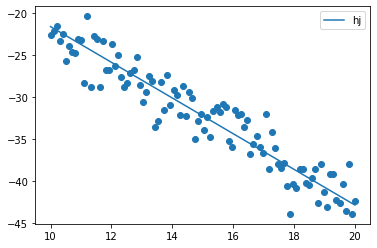

In [174]:
hj=w1*x+w0
plt.scatter(x,y)
plt.plot(x,hj,label='hj')
plt.legend()
plt.show()


Q4. Dans le cas d'une régression lineaire simple nous avons la solution directe suivante:
$$ w_{1}=\frac{\sum_{i=0}^{m}(x_{i}-\overline{x})(y_{i}-\overline{y})}{\sum_{i=0}^{m}(x_{i}-\overline{x})^2} $$

$$w_{0}=\overline{y}-w_{1}\overline{x}$$

Où $\overline{x}$ est la moyenne des éléments de x

a. Ecrire un script qui calcule les valeur de $w_{0}$ et $w_{1}$

b. Visualiser les resultats

voila w0:  -1.9569155566597551
voila w1:  -2.020651985899955


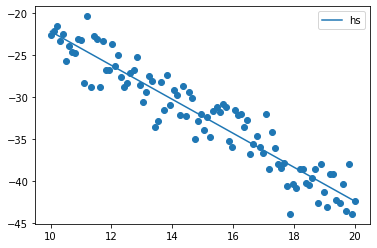

In [167]:

#Q3#Votre code ici
Y=np.mean(y)
X=np.mean(x)
w1=np.sum((x-X)*(y-Y))/np.sum((x-X)**2)
w0=Y-w1*X
print('voila w0: ',w0)
print('voila w1: ',w1)
hs=w1*x+w0
plt.scatter(x,y)
plt.plot(x,hs,label='hs')
plt.legend()
plt.show()







# III-Régression lineaire multiple
Dans ce cas $x=(x_{0}, x_{1},...,x_{n})\in \Re^{n}$ la fonction hypothèse $h(x)=w_{0}+w_{1}x_{1}+...+w_{n}x_{n}$

### Refaire les mêmes étapes pour n=2

[-19.50032526 -24.24912516 -23.34556985 -23.4686418  -21.38237427
 -23.00839001 -24.97849601 -25.87987404 -27.86382741 -25.83779808
 -25.396628   -26.99803353 -27.62570444 -26.72084694 -33.0330834
 -32.10880611 -31.20792283 -28.91217723 -32.9227617  -31.63594221
 -28.57164116 -33.19629924 -29.60222554 -35.33941103 -37.17895146
 -29.32719268 -34.04520792 -30.82400577 -39.95132068 -38.17446868
 -41.25037697 -35.97825898 -40.81807634 -36.69196632 -41.08693316
 -40.98789472 -39.38003459 -42.64145254 -38.45020819 -42.24247547
 -40.16949449 -44.58571213 -41.90765743 -44.79651779 -43.07020704
 -44.11939417 -43.39457471 -45.60131385 -47.69025483 -49.55118259
 -44.76776627 -45.22166341 -48.1448595  -48.01643143 -50.96668621
 -46.83627633 -50.92181245 -50.74802198 -52.96824121 -52.19140344
 -54.03270109 -49.39396471 -51.16579477 -55.1005506  -53.76462827
 -52.45776815 -58.87990238 -54.27580037 -53.10882468 -59.24205858
 -57.67846459 -56.85928039 -62.18313558 -59.64640069 -59.10195601
 -56.392743

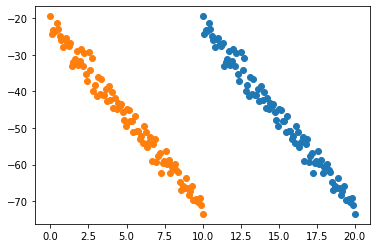

In [213]:
#Q1
x1=np.linspace(10,20,100)
x2=np.linspace(0,10,100)
y=(x1*-2)+(x2*-3) + np.random.normal(-2,2,size=(100))
print(y)
plt.plot(x1,y,'o')
plt.plot(x2,y,'o')
plt.show()

voila j1:  761773.2734140313
voila j2:  946332.5204809261


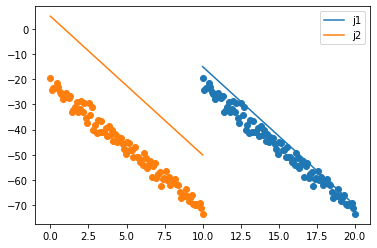

In [220]:
#Q2
#tracer h(x)
h1=-2*x1 + (-3.5)*x2 + 5
h2=-2*x2 + (-3.5)*x2 + 5

#calculer la fonction
def cost_func(w0,w1,w2,x1,x2,y):
    m=100
    j=1/(2*m)+np.sum((w0 + w1 * x1 + w1  *x2 ) -y)**2
    return j
j1=cost_func(2,-2,-2,x1,x2,y)
print('voila j1: ',j1)
j2=cost_func(3,-2,-2,x1,x2,y)
print('voila j2: ',j2)
plt.scatter(x1,y)
plt.scatter(x2,y)
plt.plot(x1,h1,label='j1')
plt.plot(x2,h2,label='j2')
plt.legend()
plt.show()

In [229]:
#Q3
# votre code ici

m=100
#initiale coffection w0,w1
w0=6
w1=8
w2=7

alpha=0.006 #learning rate

def gradian_function_cost(w0,w1,w2,x1,x2,y):
  for i in range(7000):
    temp0=w0-(alpha/m)*np.sum((w0+w1*x)-y)
    temp1=w1-(alpha/m)*np.sum(((w0+w1*x)-y)*x1)
    temp2=w2-(alpha/m)*np.sum(((w0+w2*x)-y)*x2)
    w0=temp0
    w1=temp1
    w2=temp2
  print('voila w0: ',w0)
  print('voila w1: ',w1)
  print('voila w1: ',w2)
  return w0,w1,w2
w0,w1,w2=gradian_function_cost(w0,w1,w2,x1,x2,y)

voila w0:  22.629610501911294
voila w1:  -4.635546062425738
voila w1:  -4.6565868807033235


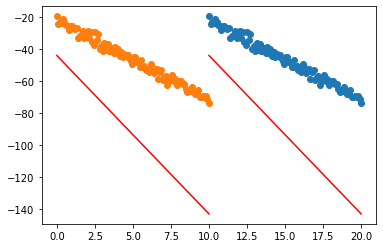

In [238]:
hj_multi=w1*x1+w2*x2+w0
plt.scatter(x1,y)
plt.scatter(x2,y)
# h(x)= w1*x1 + w2*x2 + w0 => y
plt.plot(x1,hj_multi, color='red')
plt.plot(x2,hj_multi , color='red')

5.4785981677772
-4.9467261437233345
-4.9467261437233345


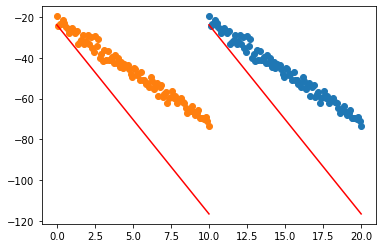

In [232]:
Y=np.mean(y)
X=np.mean(x)
X1=np.mean(x1)

w1=np.sum((x-X)*(y-Y))/np.sum((x-X)**2)
w2=np.sum((x-X1)*(y-Y))/np.sum((x-X1)**2)
w0 = ( y.mean() )- ( w1*(x1.mean()) )+( y.mean() )- ( w2*(x2.mean()) )
print(w0)
print(w1)
print(w2)
#b
plt.scatter(x1,y)
plt.scatter(x2,y)
# hj_multi(xn) => y
plt.plot(x1,hj_multi , color='red')
plt.plot(x2,hj_multi , color='red')
